In [30]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
#import data set package from sklearn
from sklearn import datasets

In [32]:
#load the boston data set
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)

In [33]:
#to see features
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [56]:
#target
targets= boston.target
features["PRICE"]=targets.reshape(-1,1)
feature_list = list(boston.feature_names)

In [35]:
#data cleaning/preprocessing activity
features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [36]:
#to see the data type of the features
features.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [37]:
#check the data type and NaN value or empty value
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## as per the above there is no Null value/NaN value in the data set,so no need of data cleaning/ pre processing of data

In [38]:
features.isnull().values.any()

False

In [39]:
features.isnull().values.all()

False

In [40]:
# Getting basic statistical information about the columns
features.describe() # Only numerical columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [41]:
X=features.iloc[:,:-1]
y=features.iloc[:,-1]

In [42]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [45]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10,random_state=0)
regressor.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [46]:
#predicting the data
y_predict = regressor.predict(X_test)

In [47]:
#check the mean square value
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,y_predict)


mse

In [48]:
print(mse)

19.75870708661417


In [49]:
#Evaluating the Algorithm
#For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error. 
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 2.610551181102362
Mean Squared Error: 19.75870708661417
Root Mean Squared Error: 4.445076724491285


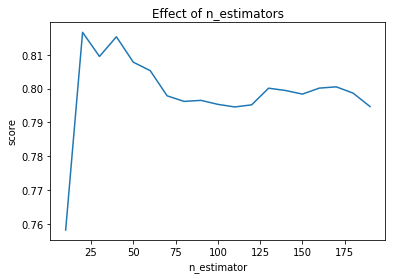

In [50]:
#changing the estimator to know at what point we get to the good RMSE
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    regressor.set_params(n_estimators=n)
    regressor.fit(X_train, y_train)
    #y_predict = regressor.predict(X_test)
    #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
    scores.append(regressor.score(X_test, y_test))
    #print(n)
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [51]:
scores

[0.7581524455260877,
 0.8166392575765254,
 0.8095093023305974,
 0.8153282832105997,
 0.8078054237330016,
 0.8053054655999057,
 0.7978545406124506,
 0.796207716541818,
 0.7965099021769634,
 0.7953332107666417,
 0.7945638302484643,
 0.7951846069188153,
 0.8001146788051603,
 0.7994355699480024,
 0.7983636819905991,
 0.8001341467887355,
 0.8005155726534842,
 0.7986543137686946,
 0.7946772570042392]

In [52]:
## as per the above analysis at the Estimator =20, we can predict the price of the house clearly

regressor = RandomForestRegressor(n_estimators = 20,random_state=0)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)

In [53]:
#Evaluating the Algorithm
#For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error. 
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))


Mean Absolute Error: 2.4893700787401567
Mean Squared Error: 14.980392125984249
Root Mean Squared Error: 3.870451152770727


In [58]:
##Feature Importance
print(regressor.feature_importances_)

# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances

[3.18471455e-02 1.01608269e-03 6.90236009e-03 3.88690437e-04
 2.05554451e-02 4.05527024e-01 1.56969278e-02 3.73856278e-02
 3.61554314e-03 1.86509199e-02 2.00559219e-02 9.03535407e-03
 4.29322957e-01]


[('CRIM', 0.03),
 ('ZN', 0.0),
 ('INDUS', 0.01),
 ('CHAS', 0.0),
 ('NOX', 0.02),
 ('RM', 0.41),
 ('AGE', 0.02),
 ('DIS', 0.04),
 ('RAD', 0.0),
 ('TAX', 0.02),
 ('PTRATIO', 0.02),
 ('B', 0.01),
 ('LSTAT', 0.43)]

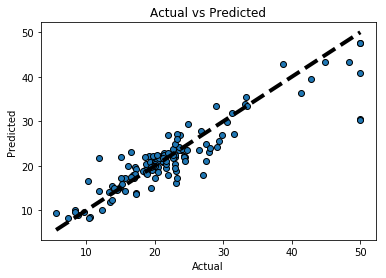

In [28]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
ax.scatter(y_test, y_predict, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [60]:
##Feature Importance
pd.DataFrame(regressor.feature_importances_,X.columns)

,0
CRIM,0.031847
ZN,0.001016
INDUS,0.006902
CHAS,0.000389
NOX,0.020555
RM,0.405527
AGE,0.015697
DIS,0.037386
RAD,0.003616
TAX,0.018651
